## 데이터 불러오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import numpy as np

plt.rc('font', family='batang') # For Windows
print(plt.rcParams['font.family'])

data1 = pd.read_csv(r'C:\Users\vuswl\Data Science\2023년_따릉이대여_날씨_3시간별.csv', engine = 'python', encoding='CP949')
data1.head()

['batang']


,Unnamed: 0,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),대여소번호,대여건수,대여월,평일
0,0,1,1.533333,0.0,1.633333,73.333333,0.0,84.333333,162,0,1,0
1,1,1,1.533333,0.0,1.633333,73.333333,0.0,84.333333,207,2,1,0
2,2,1,1.533333,0.0,1.633333,73.333333,0.0,84.333333,213,2,1,0
3,3,1,1.533333,0.0,1.633333,73.333333,0.0,84.333333,434,1,1,0
4,4,1,1.533333,0.0,1.633333,73.333333,0.0,84.333333,474,5,1,0


In [3]:
data2 = pd.read_csv(r'C:\Users\vuswl\Data Science\2023년_따릉이반납_날씨_3시간별.csv', engine = 'python', encoding='CP949')

data2.head()

,Unnamed: 0,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),대여소번호,반납건수,반납월,평일
0,0,1,1.533333,0.0,1.633333,73.333333,0.0,84.333333,162,1,1,0
1,1,1,1.533333,0.0,1.633333,73.333333,0.0,84.333333,207,4,1,0
2,2,1,1.533333,0.0,1.633333,73.333333,0.0,84.333333,213,2,1,0
3,3,1,1.533333,0.0,1.633333,73.333333,0.0,84.333333,434,0,1,0
4,4,1,1.533333,0.0,1.633333,73.333333,0.0,84.333333,474,1,1,0


---

## [histplot] 따릉이 대여, 반납건수 분포 알아보기

현재 data1에는 시간별 따릉이 <b>"대여"</b>에 관한 정보가, data2에는 시간별 따릉이 <b>"반납"</b>에 관한 정보가 들어있습니다.<br>
지금부터는 이해를 돕기 위해 시각화된 자료들을 통해 정보를 분석해보도록 하겠습니다.

가장 처음으로, histplot을 이용하여 대여 및 반납 건수를 알아보겠습니다.<br>
왼쪽에 연한 파란색으로 표시된 그래프는 대여 건수, 오른쪽에 주황색으로 표시된 그래프는 반납 건수를 나타냅니다.

분포의 치우침을 방지하기 위하여, 데이터에 로그를 씌워 그래프를 만든 결과입니다.

C:\Users\vuswl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vuswl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='반납건수', ylabel='Count'>

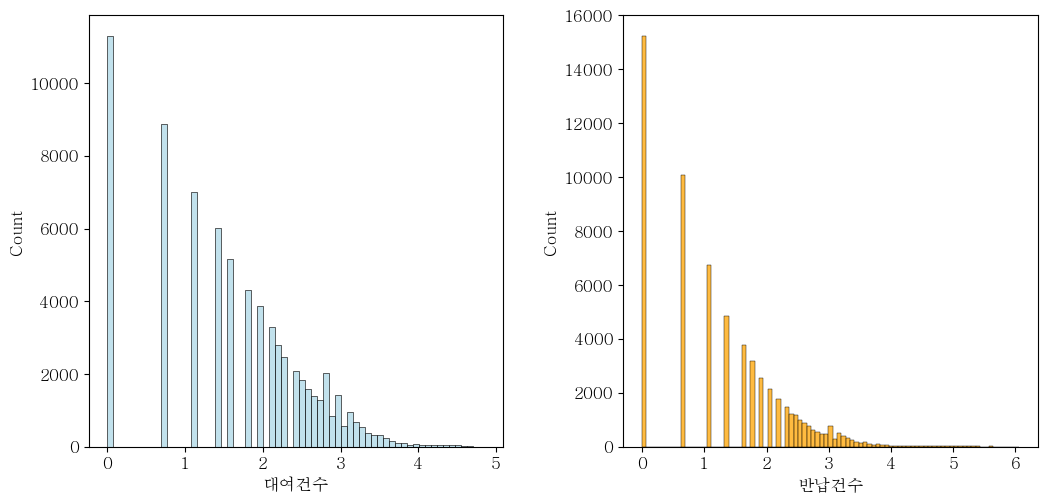

In [6]:
# 분포 : 이용, 반납건수
mpl.rc('font', size=12)
mpl.rc('axes', titlesize=15)
fig, ax = plt.subplots(nrows = 1, ncols = 2)
plt.tight_layout()
fig.set_size_inches(11, 5)

sns.histplot(np.log(data1["대여건수"]), ax = ax[0], color = 'lightblue')
sns.histplot(np.log(data2["반납건수"]), ax = ax[1], color = 'orange')

---

## [막대그래프 & 박스플롯] 시간대별 대여/반납 건수와 월별 대여/반납 건수

이번에는 막대그래프를 이용한 시간대별 대여/반납 건수와, 박스플롯을 이용한 월별 대여/반납 건수를 알아보겠습니다.<br>
마찬가지로 왼쪽의 하늘색 그래프가 대여 건수, 오른쪽의 주황색 그래프가 반납 건수를 나타냅니다.<br>

막대 그래프를 통해 대여 건수와 반납 건수 모두 8개의 시간대 중 <b>6번째 시간대</b>에서 가장 높은 수치를 기록하고 있는 것을 알 수 있습니다.<br>
6번째 시간대는 저희 조가 임의로 분할한 시간 중 <b>퇴근 시간</b>에 속하는 시간입니다. (17~19시)<br>

또한 박스플롯을 통해 대여 건수와 반납 건수 모두 5,6월 그리고 9,10월에 가장 높은 수치를 보인다는 것을 확인했습니다.<br>
반납 건수가 부족한 상위 지역 30개를 한 분석이므로, 반납 건수 보다는 대여 건수의 수치가 높다는 것도 그래프에서 보여집니다.<br>

<Axes: xlabel='반납월', ylabel='반납건수'>

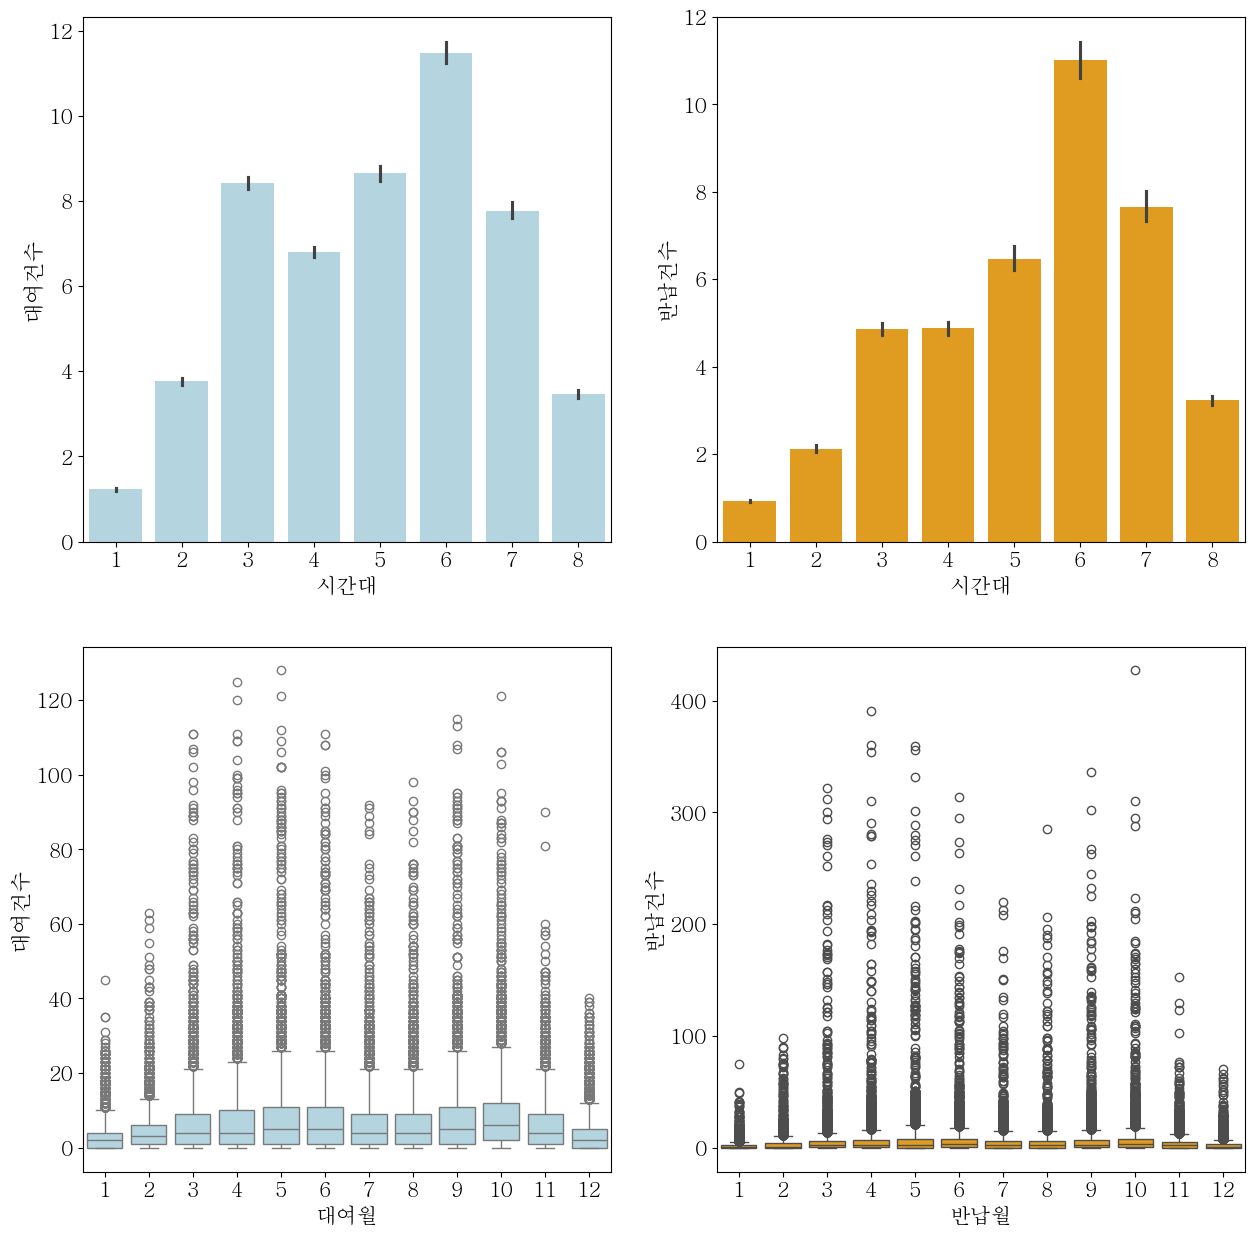

In [7]:
# 시간대별 이용, 반납건수 막대그래프(위)와 월별 이용, 반납 건수 박스플롯(아래)
mpl.rc('font', size=15)
mpl.rc('axes', titlesize=15)
fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(15, 15)

sns.barplot(x = '시간대', y = '대여건수', data = data1, ax = ax[0, 0], color = 'lightblue')
sns.barplot(x = '시간대', y = '반납건수', data = data2, ax = ax[0, 1], color = 'orange')
sns.boxplot(x = '대여월', y = '대여건수', data=data1, ax = ax[1, 0], color = 'lightblue')
sns.boxplot(x = '반납월', y = '반납건수', data=data2, ax = ax[1, 1], color = 'orange')

---

## [포인트플롯] 평일 여부에 따른 시간대별 대여/반납 건수

다음으로는 평일 여부가 대여 건수에 영향을 미치는 지 알아보기 위하여 포인트플롯을 사용하여 시각화를 진행해보겠습니다.<br>
평일이라면 1, 평일이 아니라면 0으로 데이터를 만들었습니다.<br>
왼쪽 그래프는 대여 건수, 오른쪽 그래프는 반납 건수를 의미합니다.<br>

왼쪽 그래프를 살펴보면, 3번째와 6번째 시간대에는 평일 이용 건수가 평일이 아닌 날의 이용 건수보다 많음을 확인할 수 있습니다.<br>
<b>평일인지 여부는 따릉이 대여 건수에 유의미한 영향을 미칠 것</b>으로 예상해볼 수 있습니다.<br>

오른쪽 그래프를 살펴보면, 3번째 시간대에 미미하게 평일일 때가 반납 건수가 높다는 걸 제외하고는<br>
대부분 비슷한 수치를 보인다는 것을 알 수 있습니다.<br>
아주 눈에 띄는 차이가 그래프에 표현되지 않는 것으로 미루어보았을 때, <br>
<b>평일 여부가 따릉이 반납 건수에 미치는 영향은 비교적 적다</b>는 것을 알 수 있습니다.<br>

<Axes: xlabel='시간대', ylabel='반납건수'>

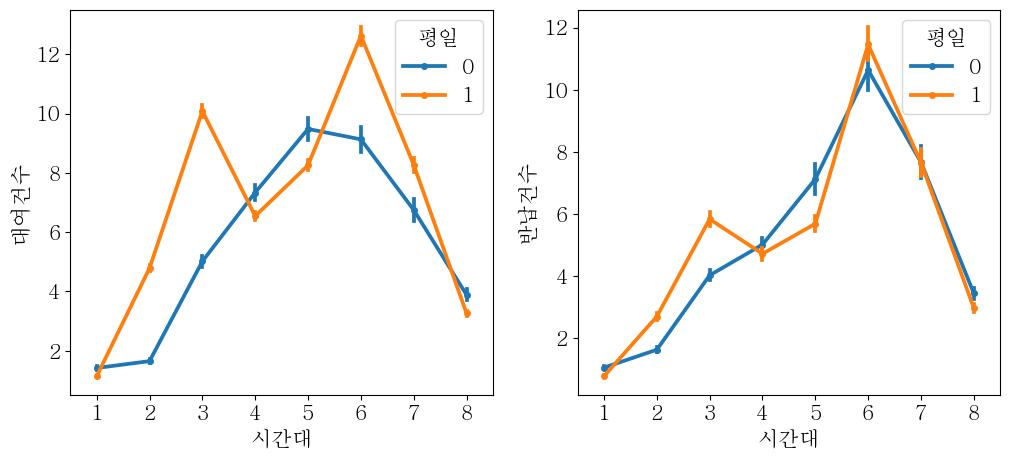

In [8]:
# 평일 여부에 따른 시간대별 이용건수, 반납건수 포인트플롯
mpl.rc('font', size=15)
mpl.rc('axes', titlesize=15)
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 5)

sns.pointplot(x = "시간대", y = "대여건수", data = data1, hue = "평일", markersize = 3, ax = ax[0])
sns.pointplot(x = "시간대", y = "반납건수", data = data2, hue = "평일", markersize = 3, ax = ax[1])

---

## [포인트 플롯]을 이용한 시간대에 따른 대여월별 대여 / 반납 건수

이번에도 포인트 플롯을 이용하여 시각화한 자료를 살펴봅니다.<br>
왼쪽은 시간대에 따른 대여월별 대여건수를 나타내는 그래프입니다.<br>
오른쪽은 시간대에 따른 반납월별 반납건수를 나타내는 그래프입니다.<br>

두 그래프에서 모두 아까 언급한 퇴근시간대인 <b>6번째 시간대(17시~19시)</b>가 가장 높이 위치해 있는 것을 알 수 있습니다. (가장 위의 보라색 그래프)<br>
두 그래프에서 모두 가장 낮게 위치한 시간대는 1번째 시간대입니다. (가장 아래의 살구색 그래프)<br>
아까 박스플롯에서 봤던 것 보다, 여기서는 5월과 10월의 대여 및 반납 수가 도드라지는 것을 확인할 수 있습니다. <br>
사람들이 <b>5월과 10월에 가장 따릉이를 많이 사용</b>하고 있다는 것을 보여줍니다.<br>

<Axes: xlabel='반납월', ylabel='반납건수'>

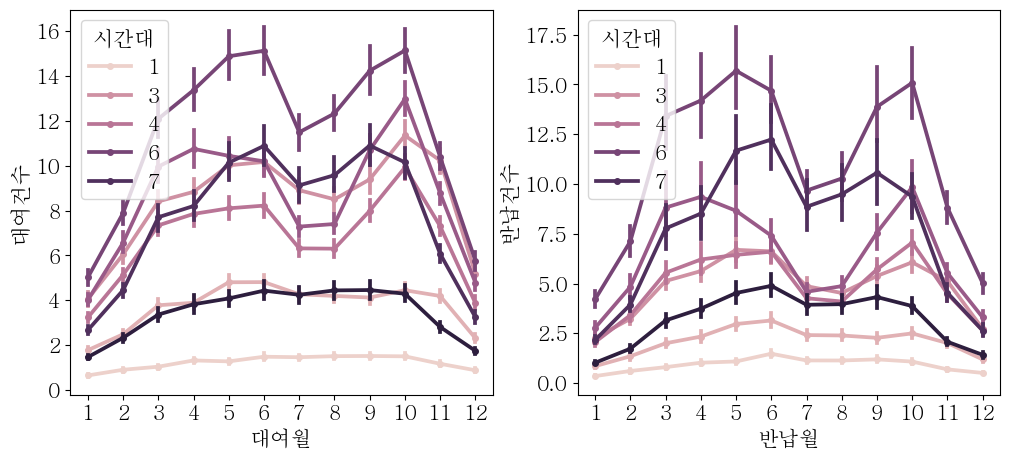

In [9]:
# 시간대에 따른 대여월별 이용건수 (포인트플롯)
mpl.rc('font', size=15)
mpl.rc('axes', titlesize=15)
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 5)

sns.pointplot(x = "대여월", y = "대여건수", data = data1, hue="시간대", markersize = "3", ax = ax[0])
sns.pointplot(x = "반납월", y = "반납건수", data = data2, hue="시간대", markersize = "3", ax = ax[1])

---

## [산점도 그래프] 대여 / 반납 건수와 수치형 변수들의 관계

저희 2팀은 데이터 자료를 생성할 때 총 3개 데이터를 이용했는데요, 그 데이터들 중에는 기온, 강수량과 같은 날씨 데이터도 포함되어 있습니다!<br>
이번에는 산점도 그래프를 이용해서 수치형 변수들과 대여 및 반납 건수가 어떤 관계를 가지는지 알아보도록 하겠습니다. <br>
그래프는 2행 3열로 표시했으며, 왼쪽부터 기온, 강수량, 풍속, 습도, 적설, 미세먼지농도를 의미합니다.<br>
산점도는 <b>회귀선을 포함하고 있으므로 양의 기울기인지 음의 기울기인지 판단이 가능</b>합니다.<br>

먼저 대여 건수와 수치형 변수들의 관계입니다. <br>
이때는 그래프의 회귀선을 하늘색으로 표시했습니다.<br>

예를 들어 첫 번째 그래프는 기온과 대여 건수의 상관관계를 나타냅니다.<br>
이때 회귀선이 양의 기울기를 가지므로, <b>기온이 높아질 수록 대여 건수가 늘어난다는 것을 알 수 있습니다.</b><br>

강수량은 낮아질 수록 대여 건수가 올라갑니다.<br>
당연히 비가 오는 날 보다는 맑은 날에 따릉이를 이용하는 걸 선호하는 사람들이 많겠죠?<br>

풍속은 양의 상관관계이기는 하나 그 정도가 매우 미미하다고 볼 수 있습니다.<br>
습도와 적설은 낮아질수록 대여량이 증가합니다.<br>

미세먼지 농도는 미미한 양의 기울기를 가지고 있는데, <br>
반드시 미세먼지와 기온이 반비례하는 것은 아니지만 대체로 기온이 올라가면 미세먼지농도도 올라간다고 합니다.<br>
기온이 올라가면 날씨가 따뜻해진다는 뜻이고, 이때 미세먼지 농도가 살짝 올라가는 경향이 있어 이런 그래프가 나온 것으로 예상해볼 수 있습니다.<br>

<Axes: xlabel='미세먼지농도(㎍/㎥)', ylabel='대여건수'>

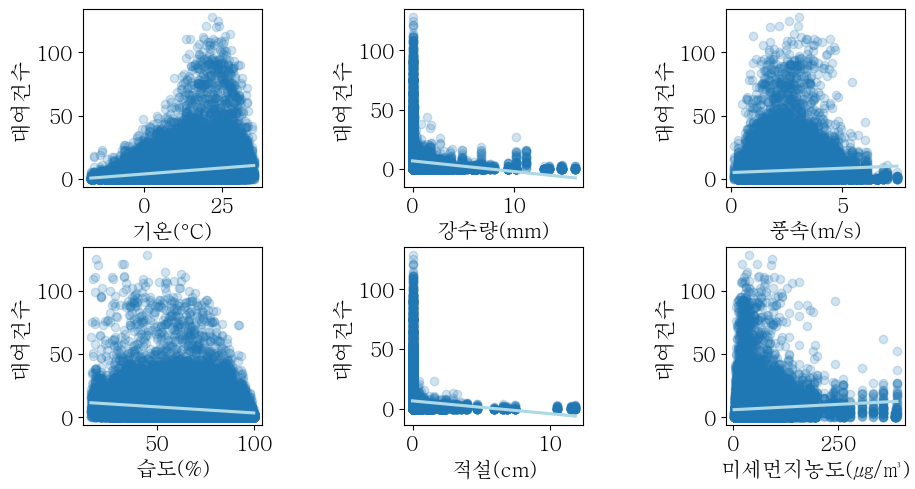

In [10]:
# 회귀선을 포함한 산점도 그래프 : 이용 / 반건수와 수치형 변수들의 관계

# 2행 3열으로 Figure 설정
mpl.rc('font', size = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 3)
plt.tight_layout()
figure.set_size_inches(10, 5)

# 서브플롯 할당
# 기온, 강수량, 풍속, 습도, 적설, 미세먼지농도, 대여월, 평일, 시간대
sns.regplot(x = "기온(°C)", y = "대여건수", data = data1, ax = axes[0, 0], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'lightblue'})
sns.regplot(x = "강수량(mm)", y = "대여건수", data = data1, ax = axes[0, 1], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'lightblue'})
sns.regplot(x = "풍속(m/s)", y = "대여건수", data = data1, ax = axes[0, 2], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'lightblue'})
sns.regplot(x = "습도(%)", y = "대여건수", data = data1, ax = axes[1, 0], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'lightblue'})
sns.regplot(x = "적설(cm)", y = "대여건수", data = data1, ax = axes[1, 1], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'lightblue'})
sns.regplot(x = "미세먼지농도(㎍/㎥)", y = "대여건수", data = data1, ax = axes[1, 2], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'lightblue'})

아래는 반납 건수와 수치형 변수들의 관계입니다. <br>
마찬가지로 2행 3열로 설정했고, 변수들의 위치는 방금 살펴본 것과 동일합니다.<br>
이 그래프들은 회귀선이 주황색으로 표시되어 있습니다.<br>

대여 건수와 마찬가지로, 기온이 높아질 수록 반납 건수 또한 증가한다는 것을 확인할 수 있습니다.<br>
앞서 살펴본 회귀선의 기울기 보다 그 정도가 미미하기는 하더라도, 수치별로 양의 기울기인지 음의 기울기인지 여부는 동일합니다.<br>
따라서 이 점을 고려했을 때 강수, 풍속, 습도, 적설, 미세먼지농도도 위에서 살펴본 것과 동일한 분석을 적용할 수 있습니다.

<Axes: xlabel='미세먼지농도(㎍/㎥)', ylabel='반납건수'>

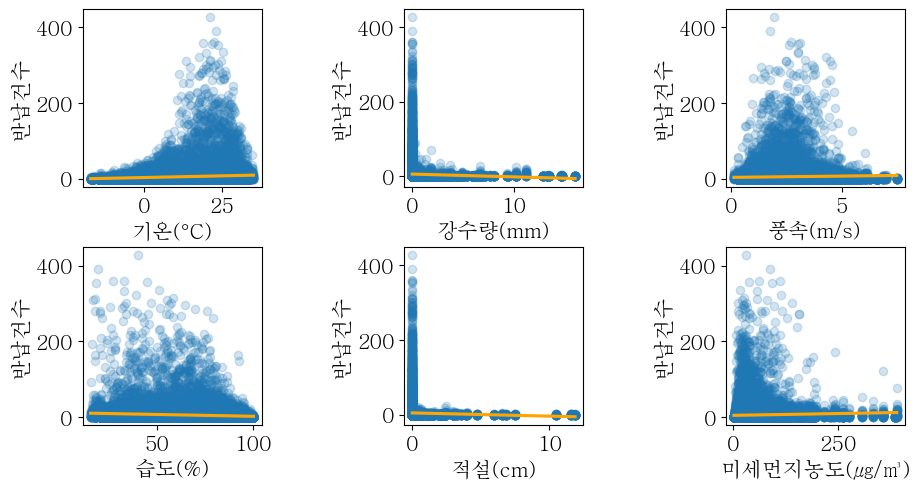

In [11]:
# 회귀선을 포함한 산점도 그래프 : 반납건수와 수치형 변수들의 관계  

# 2행 3열으로 Figure 설정
mpl.rc('font', size = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 3)
plt.tight_layout()
figure.set_size_inches(10, 5)

sns.regplot(x = "기온(°C)", y = "반납건수", data = data2, ax = axes[0, 0], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'orange'})
sns.regplot(x = "강수량(mm)", y = "반납건수", data = data2, ax = axes[0, 1], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'orange'})
sns.regplot(x = "풍속(m/s)", y = "반납건수", data = data2, ax = axes[0, 2], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'orange'})
sns.regplot(x = "습도(%)", y = "반납건수", data = data2, ax = axes[1, 0], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'orange'})
sns.regplot(x = "적설(cm)", y = "반납건수", data = data2, ax = axes[1, 1], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'orange'})
sns.regplot(x = "미세먼지농도(㎍/㎥)", y = "반납건수", data = data2, ax = axes[1, 2], scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'orange'})

---

## 대여 / 반납 건수와 수치형 변수들 간의 상관 관계 분석

바로 위에서 우리는 대여 / 반납 건수와 수치형 변수들 간의 상관 관계를 '회귀선을 포함한 산점도 그래프'를 통해 알아봤습니다.<br>
이번에는 그 상관도를 .corr() 메서드를 통해 상관계수로 확인해보겠습니다.<br>
여기서는 아까 살펴본 '기온', '풍속', '습도', '적설', '미세먼지농도'에 '평일', '시간대' 데이터도 추가하였습니다.<br>

차례대로 대여 건수와 수치형 변수들의 상관 관계 분석, 반납 건수와 수치형 변수들의 상관 관계 분석입니다.

In [85]:
# 대여 건수와 수치형 변수들 간의 상관 관계 분석
data1[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)', '미세먼지농도(㎍/㎥)', '평일', '시간대', '대여건수']].corr()

,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),평일,시간대,이용건수
기온(°C),1.000000,0.099171,-0.043191,0.165700,-0.140305,-0.117710,1.767573e-02,8.699838e-02,0.192648
강수량(mm),0.099171,1.000000,0.096240,0.265917,0.017693,-0.125315,1.799743e-02,-7.140669e-03,-0.081399
풍속(m/s),-0.043191,0.096240,1.000000,-0.218607,0.026336,0.032976,-4.289983e-02,9.789733e-02,0.065934
습도(%),0.165700,0.265917,-0.218607,1.000000,0.116047,-0.328571,1.302810e-02,-1.865924e-01,-0.175304
적설(cm),-0.140305,0.017693,0.026336,0.116047,1.000000,-0.017019,-3.918660e-02,3.397463e-04,-0.048495
미세먼지농도(㎍/㎥),-0.117710,-0.125315,0.032976,-0.328571,-0.017019,1.000000,5.892982e-02,6.836393e-03,0.064429
평일,0.017676,0.017997,-0.042900,0.013028,-0.039187,0.058930,1.000000e+00,2.332787e-15,0.027301
시간대,0.086998,-0.007141,0.097897,-0.186592,0.000340,0.006836,2.332787e-15,1.000000e+00,0.124567
이용건수,0.192648,-0.081399,0.065934,-0.175304,-0.048495,0.064429,2.730065e-02,1.245673e-01,1.000000


In [86]:
# 반납건수와 수치형 변수들 간의 상관 관계 분석
data2[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)', '미세먼지농도(㎍/㎥)', '평일', '시간대', '반납건수']].corr()

,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),평일,시간대,반납건수
기온(°C),1.000000,0.099171,-0.043191,0.165700,-0.140305,-0.117710,1.767573e-02,8.699838e-02,0.149674
강수량(mm),0.099171,1.000000,0.096240,0.265917,0.017693,-0.125315,1.799743e-02,-7.140669e-03,-0.058063
풍속(m/s),-0.043191,0.096240,1.000000,-0.218607,0.026336,0.032976,-4.289983e-02,9.789733e-02,0.051039
습도(%),0.165700,0.265917,-0.218607,1.000000,0.116047,-0.328571,1.302810e-02,-1.865924e-01,-0.139795
적설(cm),-0.140305,0.017693,0.026336,0.116047,1.000000,-0.017019,-3.918660e-02,3.397463e-04,-0.034037
미세먼지농도(㎍/㎥),-0.117710,-0.125315,0.032976,-0.328571,-0.017019,1.000000,5.892982e-02,6.836393e-03,0.050867
평일,0.017676,0.017997,-0.042900,0.013028,-0.039187,0.058930,1.000000e+00,2.332787e-15,0.005832
시간대,0.086998,-0.007141,0.097897,-0.186592,0.000340,0.006836,2.332787e-15,1.000000e+00,0.134650
반납건수,0.149674,-0.058063,0.051039,-0.139795,-0.034037,0.050867,5.832102e-03,1.346503e-01,1.000000


---

## 이용 / 반납 건수와 수치형 변수들 간의 상관계수를 나타낸 히트맵
이번에는 위에서 확인한 상관계수를 히트맵에 넣어 보기 좋게 확인해보겠습니다.<br>
상관계수가 1에 가까울 수록 해당 데이터들의 상관 관계가 높다는 것을 의미합니다.<br>
저희는 종속변수인 <b>이용건수</b>와 <b>반납건수</b>를 중심으로 살펴보겠습니다. <br>
즉, 맨 아랫줄을 살펴보면 저희의 목표인 이용 / 반납 건수와 수치형 변수들 간의 상관 관계를 모두 확인할 수 있습니다.<br>

먼저 이용건수 히트맵에서는, 기온과 이용 건수의 상관 계수가 0.19로 가장 높게 나타나고 있습니다.<br>
이는 <b>기온이 이용 건수에 가장 많은 영향을 미친다</b>는 것으로 해석해볼 수 있습니다.<br>

그 다음으로는 0.12의 상관 계수를 가지는 시간대가 영향을 많이 미칩니다.<br>
습도를 제외한 나머지 변수들의 경우 상관 계수가 0.1을 채 넘지 않아, 영향을 미치는 정도가 기온과 시간대에 비해 미미하다는 것을 알 수 있습니다.<br>
습도는 -0.18의 상관계수를 가지고 있는데, 이는 습도와 이용 건수가 유의미한 음의 관계를 가지고 있다고 해석할 수 있습니다.

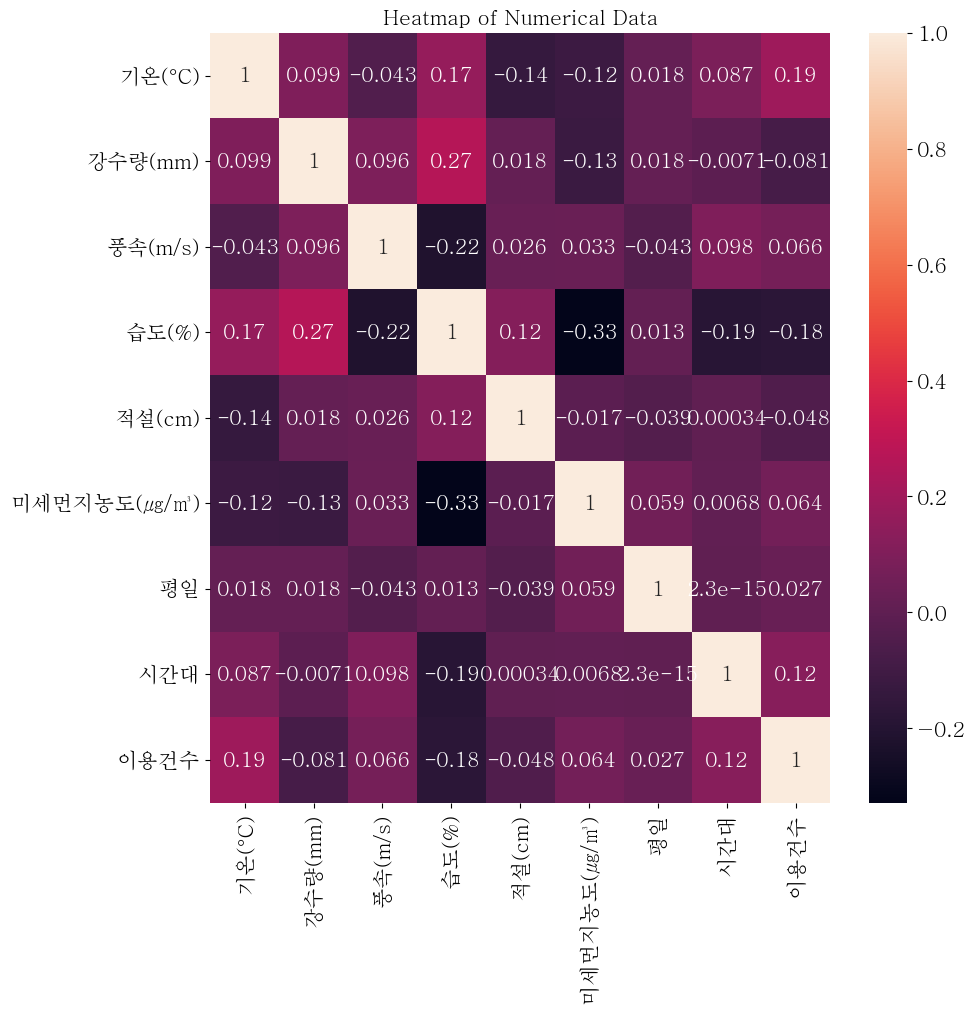

In [88]:
# 이용건수와 수치형 변수들 간의 상관 관계를 나타낸 히트맵

corrMat = data1[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)', '미세먼지농도(㎍/㎥)',  '평일', '시간대', '이용건수']].corr()
fig, ax=plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data');

마지막으로 반납 건수와 수치형 변수들의 상관계수를 나타내고 있는 히트맵을 분석해보겠습니다.<br>

상관계수 자체는 기온이 0.15, 시간대가 0.13으로 아까 이용 건수와의 상관 관계에 비해서는 조금 낮은 수치이지만,<br>
타 변수들과 비교했을 때 상대적으로 가장 높은 상관 관계를 가지고 있으므로 해석 자체는 아까와 동일하게 할 수 있습니다.<br>

상관 계수를 추출할 때 이용한 변수들 중 기온과 시간대가 반납 건수에 가장 많은 영향을 미치고 있고,<br>
습도도 음의 관계 중에는 -0.14로 유의미한 영향을 미치고 있습니다.

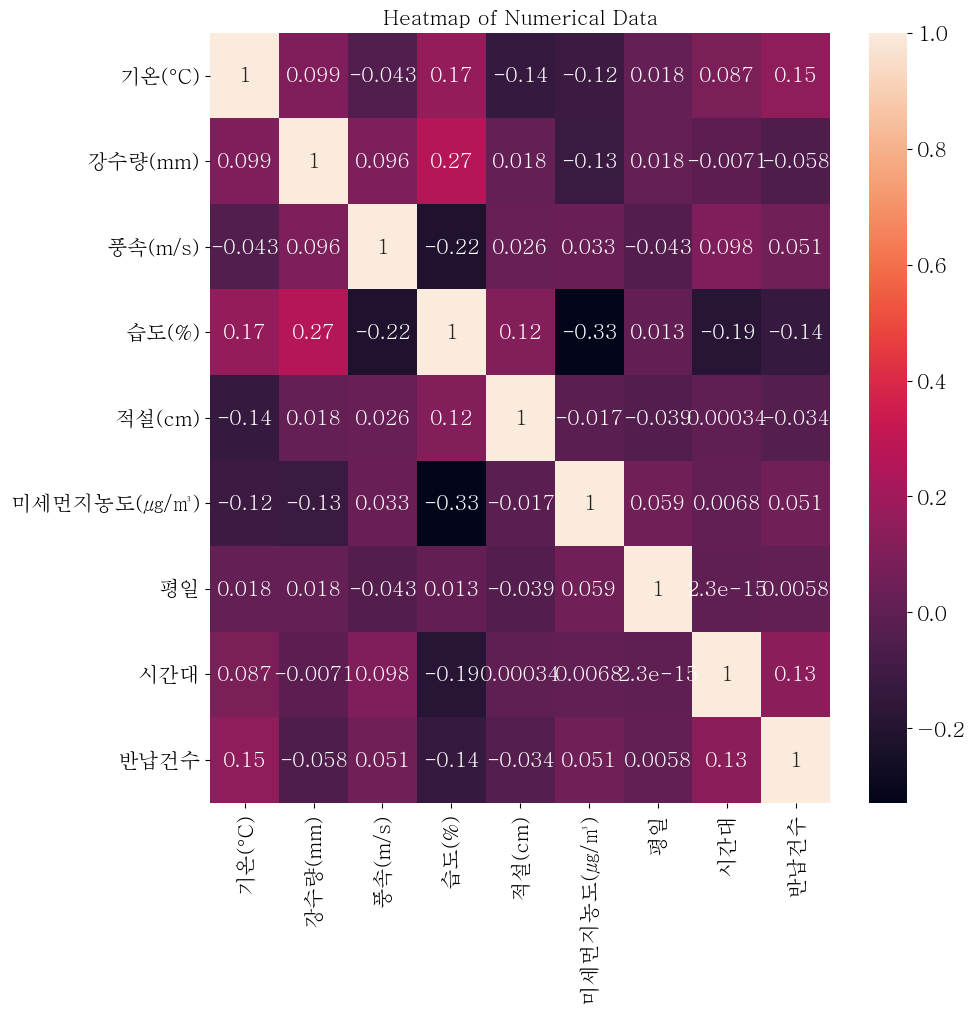

In [89]:
# 반납건수와 수치형 변수들 간의 상관 관계를 나타낸 히트맵

corrMat = data2[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)', '미세먼지농도(㎍/㎥)',  '평일', '시간대', '반납건수']].corr()
fig, ax=plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data');

---

지금까지 다양한 시각화 자료를 통해 저희의 데이터를 분석해봤습니다.<br>
이제 이 데이터를 이용해 따릉이 부족을 예측하는 모델을 만드는 과정을 진행하도록 하겠습니다.